In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import os

In [2]:
colours = cm.hot(np.linspace(0,1,100))

In [3]:
os.chdir('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer')

In [257]:
NPoMv2_gap = pd.read_csv('NPoMv2 hBN n2.13 gap.txt')
NPoMv2_wl = pd.read_csv('NPoMv2 hBN n2.13 wl.txt')
jjb_cit_wl_60nm = pd.read_csv('jjb n1.5 d0.95 60nm wl.txt')
jjb_hBN_wl_60nm = pd.read_csv('jjb hBN 60nm wl.txt')
jjb_hBN_wl_80nm = pd.read_csv('jjb n1.5 80nm wl.txt')

In [194]:
# Maximum of one of these distances can be an array
# In this model the gap thickness consists of three material thicknesses, each with their own refractive index
# Normally, the spacer thickness is constant as is the thickness of the surrounding ligand, so the air thickness is
# swept in thickness and an average of the refractive indeces is taken

def alc_model(d_mat, d_cit, d_air, n_mat, n_cit, wl_corr, R):
    
    d_gap = d_mat + d_cit + d_air
    eps_mat = n_mat**2
    eps_cit = n_cit**2
    
    wl_l1 = np.zeros(len(d_gap))
    eps_gap = np.zeros(len(d_gap))
    
    for i in range(0, len(d_gap)):
        eps_gap[i] = (eps_mat*d_mat + eps_cit*d_cit + d_air[i])/d_gap[i]
        wl_l1[i] = ((np.sqrt(eps_gap[i]))*np.log(1+0.15*R/d_gap[i]))**0.5
        
    if wl_corr == True and R==80:
        wl_l1 = wl_l1*219 + 300
    elif wl_corr== True and R==60:
        wl_l1 = wl_l1*205+ 280.2
    else:
        pass
        
    plt.plot(d_gap, wl_l1)
    
    return wl_l1, d_gap, eps_gap
    

In [195]:
def alc_model_cit(d_mat, d_cit, d_air, n_mat, n_cit, wl_corr, R):
    
    d_gap = d_mat + d_cit + d_air
    eps_mat = n_mat**2
    eps_cit = n_cit**2
    
    wl_l1 = np.zeros(len(d_gap))
    eps_gap = np.zeros(len(d_gap))
    
    for i in range(0, len(d_gap)):
        eps_gap[i] = (eps_mat*d_mat + eps_cit*d_cit[i] + d_air)/d_gap[i]
        wl_l1[i] = ((np.sqrt(eps_gap[i]))*np.log(1+0.15*R/d_gap[i]))**0.5
        
    if wl_corr == True and R==80:
        wl_l1 = wl_l1*219 + 300
    elif wl_corr== True and R==60:
        wl_l1 = wl_l1*205+ 280.2
    else:
        pass
    
    plt.plot(d_gap, wl_l1)
    
    return wl_l1, d_gap, eps_gap

In [196]:
# In this model, the usual equation for the l=1 mode is used, with the thickness of a constant spacer varied
def jjb_model_nsweep(n_min, n_max, d_gap, wl_corr, R):
    
    n_gap = np.linspace(n_min, n_max, 1000)
    eps_gap = n_gap**2
    
    wl_l1 = np.zeros(len(n_gap))
    for i in range(0, len(n_gap)):
        wl_l1[i] = ((np.sqrt(eps_gap[i]))*np.log(1+0.15*R/d_gap))**0.5
    
    if wl_corr == True and R==80:
        wl_l1 = wl_l1*219 + 300
    elif wl_corr== True and R==60:
        wl_l1 = wl_l1*205+ 280.2
    else:
        pass
    
    plt.plot(n_gap, wl_l1)
    
    return wl_l1, n_gap

In [263]:
# In this model, the usual equation for the l=1 mode is used, with the thickness of a constant spacer varied
def jjb_model(d_min, d_max, n_gap, wl_corr, R):
    
    d_gap = np.linspace(d_min, d_max, 1000)
    eps_gap = n_gap**2
    
    wl_l1 = np.zeros(len(d_gap))
    for i in range(0, len(d_gap)):
        wl_l1[i] = ((np.sqrt(eps_gap))*np.log(1+0.15*R/d_gap[i]))**0.5
    
    if wl_corr == True and R==80:
        wl_l1 = wl_l1*219 + 290
    elif wl_corr== True and R==60:
        wl_l1 = wl_l1*220 + 258
    else:
        pass
    
    plt.plot(d_gap, wl_l1)
    
    return wl_l1, d_gap

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


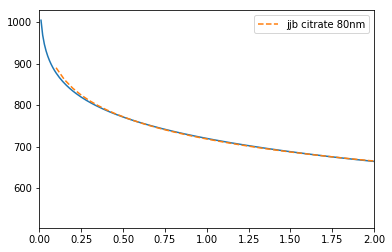

In [264]:
wl_cit_80nm, d_cit_80nm = jjb_model(0, 10, 1.5, wl_corr=True, R=80)
plt.plot(NPoMv2_gap, jjb_hBN_wl_80nm[1:], label='jjb citrate 80nm', linestyle='--')
plt.xlim(0,2)
plt.legend()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


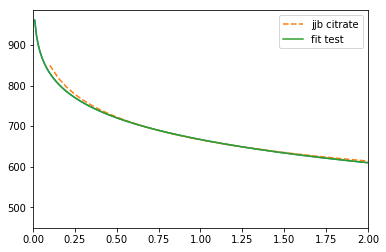

In [254]:
wl_cit_60nm, d_cit_60nm = jjb_model(0, 10, 1.5, wl_corr=True, R=60)
plt.plot(NPoMv2_gap, jjb_cit_wl_60nm[1:], label='jjb citrate', linestyle='--')
plt.plot(d_cit_60nm, wl_cit_60nm, label='fit test')
plt.xlim(0, 2)
plt.legend()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


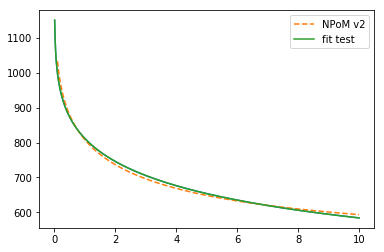

In [199]:
wl_hBN, d_hBN = jjb_model(0, 10, 2.13, wl_corr=True, R=80)
plt.plot(NPoMv2_gap, NPoMv2_wl, label='NPoM v2', linestyle='--')
plt.plot(d_hBN, wl_hBN, label='fit test')
plt.legend()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


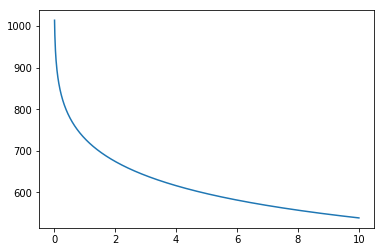

In [200]:
wl_cit, d_cit = jjb_model(0, 10, 1.5, wl_corr=True, R=80)

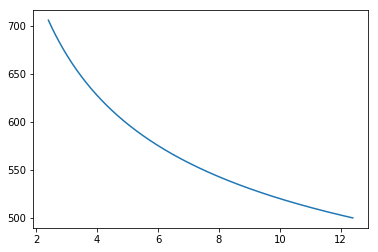

In [202]:
d_air = np.linspace(0, 10, 1000)
wl_hBN15, d_hBN15, eps_hBN15 = alc_model(d_mat=1.5, d_cit=0.9, d_air=d_air, n_mat=2.13, n_cit=1.5, wl_corr=True, R=80)

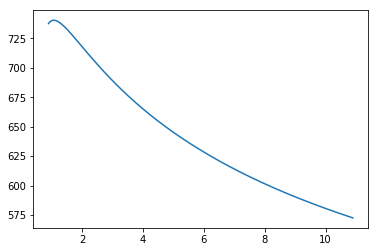

In [228]:
d_mat = np.linspace(0, 10, 1000)
wl_hBN_noair, d_hBN_noair, eps_hBN_noair = alc_model_hBN(d_mat=d_mat, d_cit=0.9, d_air=0, n_mat=2.13, n_cit=1.5, wl_corr=True, R=80)

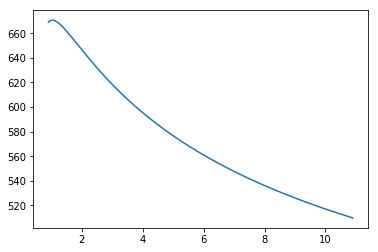

In [203]:
d_mat = np.linspace(0, 10, 1000)
wl_hBN_noair_60nm, d_hBN_noair_60nm, eps_hBN_noair_60nm = alc_model_hBN(d_mat=d_mat, d_cit=0.9, d_air=0, n_mat=2.13, n_cit=1.5, wl_corr=True, R=60)


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


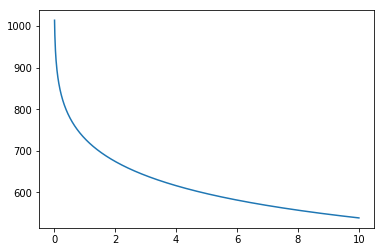

In [204]:
d_cit = np.linspace(0,10,1000)
wl_cit_noair, d_cit_noair, eps_cit_noair = alc_model_cit(d_mat=0.0, d_cit=d_cit, d_air=0, n_mat=2.13, n_cit=1.5, wl_corr=True, R=80)

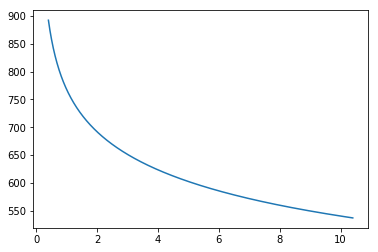

In [205]:
d_cit = np.linspace(0,10,1000)
wl_cit_noair_hBN, d_cit_noair_hBN, eps_cit_noair_hBN = alc_model_cit(d_mat=0.4, d_cit=d_cit, d_air=0, n_mat=2.13, n_cit=1.5, wl_corr=True, R=80)

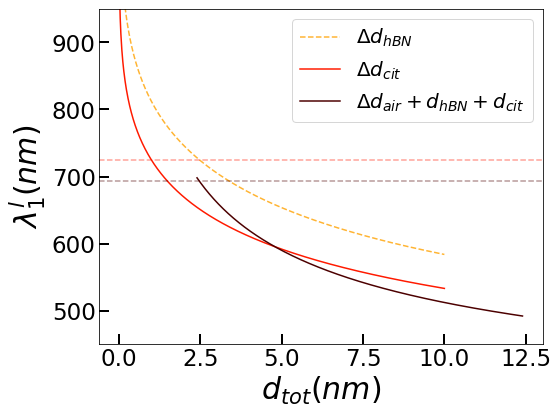

In [206]:

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(d_hBN, wl_hBN, color=colours[60], label=u'$\u0394 d_{hBN}$', linestyle='--', alpha=0.8)
ax.plot(d_cit, wl_cit-5, color=colours[40], label=u'$\u0394 d_{cit}$')
ax.plot(d_hBN15, wl_hBN15-8, color=colours[10], label=u'$\u0394 d_{air} + d_{hBN} + d_{cit}$')
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel(u'$\u03BB _1^l(nm)$', fontsize=30)
ax.axhline(693, linestyle='--', alpha=0.4, color=colours[10])
ax.axhline(724, linestyle='--', alpha=0.4, color=colours[40])
ax.set_ylim(450,950)
ax.legend(fontsize=20)
ax.tick_params(labelsize=23, direction='in', size=10, width=2)
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_cit change compared to d_air change.jpg')

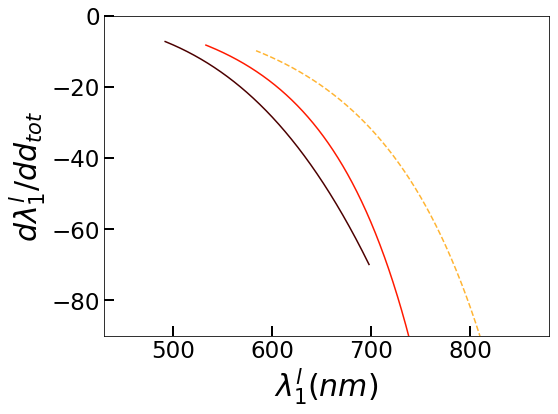

In [207]:
grad_cit= np.zeros(len(wl_cit)-1)
for i in range(len(wl_cit)-1):
    grad_cit[i] = (wl_cit[i+1] - wl_cit[i])/(d_cit[i+1]-d_cit[i])

grad_hBN15 = np.zeros(len(wl_hBN15)-1)
for j in range(len(wl_hBN15)-1):
    grad_hBN15[j] = (wl_hBN15[j+1] - wl_hBN15[j])/(d_hBN15[j+1]-d_hBN15[j])
    
grad_hBN = np.zeros(len(wl_hBN)-1)
for j in range(len(wl_hBN)-1):
    grad_hBN[j] = (wl_hBN[j+1] - wl_hBN[j])/(d_hBN[j+1]-d_hBN[j])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot((wl_cit-5)[:-1], grad_cit, color=colours[40])
ax.plot((wl_hBN15-8)[:-1], grad_hBN15, color=colours[10])
ax.plot(wl_hBN[:-1], grad_hBN, color=colours[60], linestyle='--', alpha=0.8)

ax.set_ylim(-90, 0.05)
ax.set_xlim(430, 880)
ax.set_ylabel(u'$d\u03BB _1^l/dd_{tot}$', fontsize=30)
ax.tick_params(labelsize=23, direction='in', size=10, width=2)
ax.set_xlabel('$\lambda_1^l(nm)$', fontsize=30)
#ax.axhline(grad_cit[np.argwhere(grad_cit > -80)[0][0]], alpha=0.5, linestyle='--', color=colours_2[40])
#ax.axhline(grad_hBN15[0], alpha=0.5, linestyle='--', color=colours_2[10])
#ax.legend(fontsize=20)
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_cit change compared to d_air change diff vs wl.jpg')

53.05306765921341


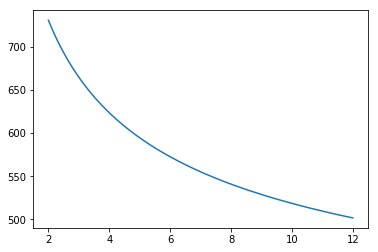

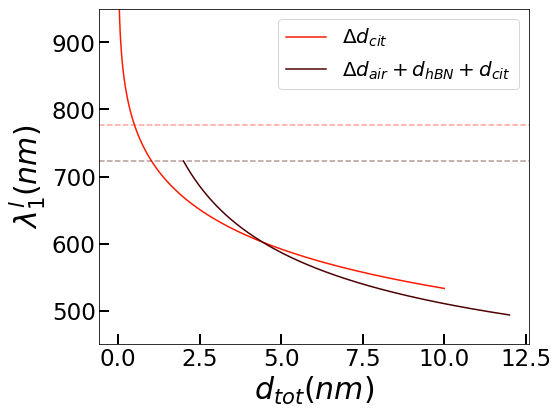

In [208]:
cit_t = 0.5
wl_hBN15_07cit, d_hBN15_07cit, eps_hBN15_07cit = alc_model(d_mat=1.5, d_cit=cit_t, d_air=d_air, n_mat=2.13, n_cit=1.5, wl_corr=True, R=80)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(d_cit, wl_cit-5, color=colours[40], label=u'$\u0394 d_{cit}$')
ax.plot(d_hBN15_07cit, wl_hBN15_07cit-8, color=colours[10], label=u'$\u0394 d_{air} + d_{hBN} + d_{cit}$')
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel(u'$\u03BB _1^l(nm)$', fontsize=30)
ax.axhline((wl_hBN15_07cit-8)[0], linestyle='--', alpha=0.4, color=colours[10])
ax.axhline((wl_cit-5)[np.argwhere(d_cit > cit_t)[0][0]], linestyle='--', alpha=0.4, color=colours[40])
ax.set_ylim(450,950)
ax.legend(fontsize=20)
ax.tick_params(labelsize=23, direction='in', size=10, width=2)
plt.tight_layout(pad=1.6)
print ((wl_cit-5)[np.argwhere(d_cit > cit_t)[0][0]]-(wl_hBN15_07cit-8)[0])
grad_test_alc = ((wl_hBN15_07cit-8)[0] - (wl_hBN15_07cit-8)[1])/(d_hBN15_07cit[0] - d_hBN15_07cit[1])
grad_test_jjb = ((wl_cit-5)[np.argwhere(d_cit > cit_t)[0][0]] - (wl_cit-5)[np.argwhere(d_cit > cit_t)[0][0]+1])/(d_cit[np.argwhere(d_cit > cit_t)[0][0]] - d_cit[np.argwhere(d_cit > cit_t)[0][0]+1]) 

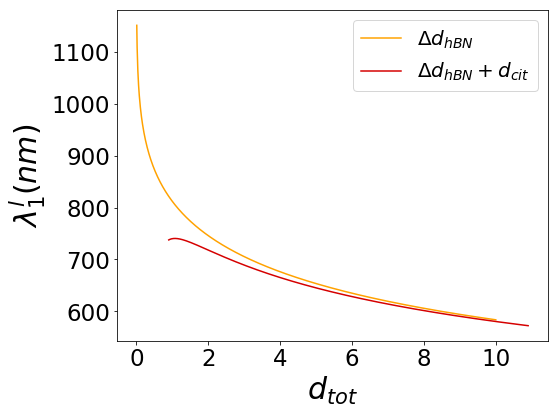

In [209]:


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(d_hBN, wl_hBN, color=colours[60], label=u'$\u0394 d_{hBN}$')
ax.plot(d_hBN_noair, wl_hBN_noair, color=colours[30], label=u'$\u0394 d_{hBN} + d_{cit}$')
ax.legend(fontsize=20)
ax.tick_params(labelsize=23)
ax.set_xlabel('$d_{tot}$', fontsize=30)
ax.set_ylabel('$\lambda_1^l(nm)$', fontsize=30)
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_hBN change w cit vs d_hBN change no cit.jpg')

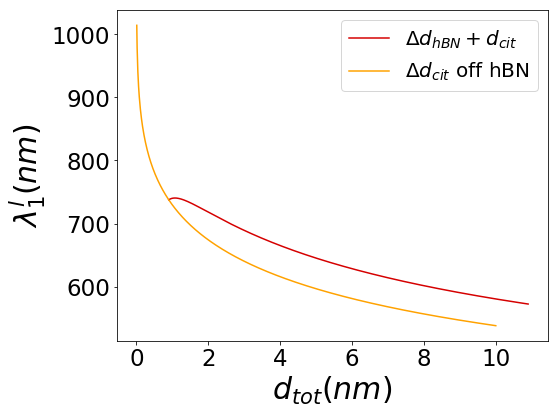

In [224]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
# sweeping the hBN thickness with contstant citrate thickness of 0.9nm
ax.plot(d_hBN_noair, wl_hBN_noair, color=colours[30], label=u'$\u0394 d_{hBN} + d_{cit}$')
#sweeping the citrate thickness with no hBN
ax.plot(d_cit_noair, wl_cit_noair, color=colours[60], label=u'$\u0394 d_{cit}$ off hBN')
ax.legend(fontsize=20)
ax.tick_params(labelsize=23)
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel('$\lambda_1^l (nm)$', fontsize=30)
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_hBN change w cit vs d_hBN change no cit.jpg')

0.24024024024024027


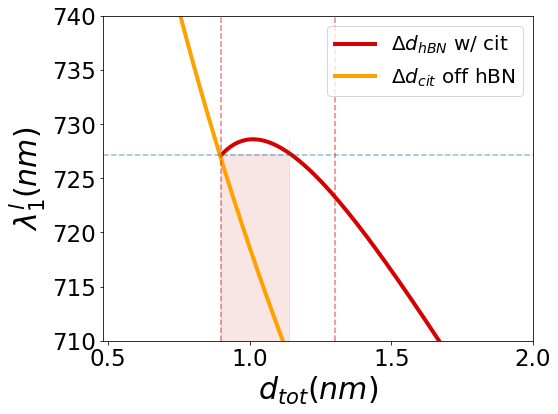

In [303]:
wl_hBN80nm_corr = wl_hBN_noair - 10.5
hBN_mod = np.linspace(0,100, len(wl_hBN80nm_corr))
wl_hBN80nm_final = wl_hBN80nm_corr-hBN_mod
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
# sweeping the hBN thickness with contstant citrate thickness of 0.9nm
ax.plot(d_hBN_noair, wl_hBN80nm_final, color=colours[30], label=u'$\u0394 d_{hBN}$ w/ cit', linewidth=4)
#sweeping the citrate thickness with no hBN
ax.plot(d_cit_80nm, wl_cit_80nm-1, color=colours[60], label=u'$\u0394 d_{cit}$ off hBN', linewidth=4)
ax.tick_params(labelsize=23)
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel('$\lambda_1^l (nm)$', fontsize=30)
ax.set_xlim(0.48,2.0)
ax.set_ylim(710, 740)

arg_eqiv = np.argwhere(wl_hBN80nm_final> wl_hBN80nm_final[0])[:][-1][0]

ax.axhline(wl_hBN80nm_final [0], linestyle = '--', alpha=0.5)
ax.axvline(d_hBN_noair[0], linestyle = '--', color=colours[30], alpha=0.5)
ax.axvline(d_hBN_noair[0]+0.4, linestyle = '--', color=colours[30], alpha=0.5 )
ax.fill_betweenx(wl_hBN80nm_final , d_hBN_noair[0], d_hBN_noair[arg_eqiv], alpha=0.1, color=colours[30])
ax.legend(fontsize=20)
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_hBN change w cit vs d_ct change 80nm NP apex zoom.jpg')

print (d_hBN_noair[arg_eqiv] - d_hBN_noair[0])

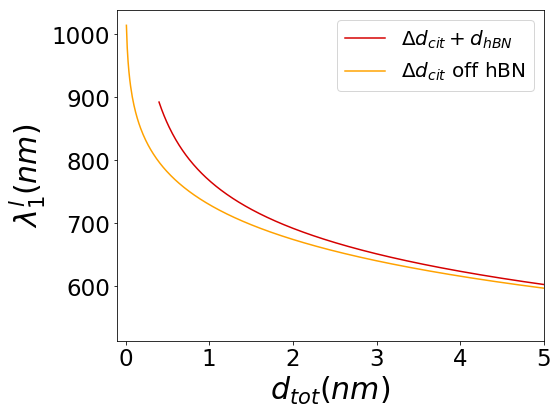

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
# sweeping the hBN thickness with contstant citrate thickness of 0.9nm
ax.plot(d_cit_noair_hBN, wl_cit_noair_hBN, color=colours[30], label=u'$\u0394 d_{cit} + d_{hBN}$')
#sweeping the citrate thickness with no hBN
ax.plot(d_cit_noair, wl_cit_noair, color=colours[60], label=u'$\u0394 d_{cit}$ off hBN')
ax.legend(fontsize=20)
ax.tick_params(labelsize=23)
ax.set_xlim(-0.1, 5)
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel('$\lambda_1^l (nm)$', fontsize=30)
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_cit change w hBN vs d_cit change no hBN 80nm.jpg')

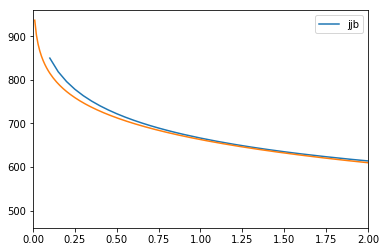

In [123]:

jjb_cit_wl_60nm = pd.read_csv('jjb n1.5 d0.95 60nm wl.txt')
plt.plot(NPoMv2_gap, jjb_cit_wl_60nm[1:], label='jjb')
plt.plot(d_cit_60nm, wl_cit_60nm-8)
plt.xlim(0, 2)
plt.legend()

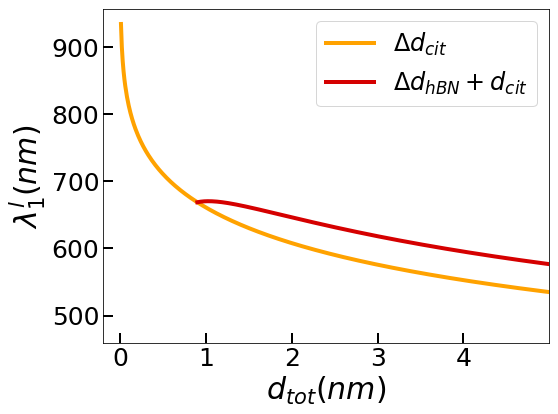

In [212]:

corr = 8
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(d_cit_60nm, wl_cit_60nm, color=colours[60], label=u'$\u0394 d_{cit}$', linewidth = 4)
ax.plot(d_hBN_noair_60nm, wl_hBN_noair_60nm, color=colours[30], label=u'$\u0394 d_{hBN} + d_{cit}$', linewidth=4)
ax.legend(fontsize=24)
ax.tick_params(labelsize=25, direction='in', width=2, size=10)
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_xlim(-0.2,5)
ax.set_ylabel('$\lambda_1^l(nm)$', fontsize=30)
ax.set_xticks(np.arange(0,5, 1))
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_hBN change w cit vs d_ct change 60nm NP.jpg')

In [273]:
def alc_model_hBN(d_mat, d_cit, d_air, n_mat, n_cit, wl_corr, R):
    
    d_gap = d_mat + d_cit + d_air
    eps_mat = n_mat**2
    eps_cit = n_cit**2
    
    wl_l1 = np.zeros(len(d_gap))
    eps_gap = np.zeros(len(d_gap))
    
    for i in range(0, len(d_gap)):
        eps_gap[i] = (eps_mat*d_mat[i] + eps_cit*d_cit + d_air)/d_gap[i]
        wl_l1[i] = ((np.sqrt(eps_gap[i]))*np.log(1+R*0.15/d_gap[i]))**0.5
        
    if wl_corr == True and R==80:
        wl_l1 = wl_l1*219 + 290
    elif wl_corr== True and R==60:
        wl_l1 = wl_l1*220 + 258
    else:
        pass
    
    plt.plot(d_gap, wl_l1)
    
    return wl_l1, d_gap, eps_gap

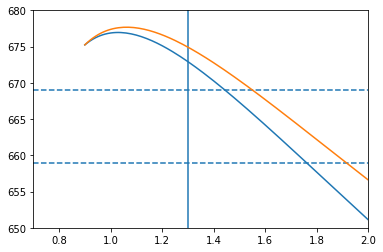

In [275]:
d_hBN = np.linspace(0, 10, 1000)
corr = np.linspace(0, 50, len(d_hBN))
wl_hBN_noair_60nm, d_hBN_noair_60nm, eps_hBN_noair_60nm = alc_model_hBN(d_mat=d_hBN, d_cit=0.9, d_air=0, n_mat=2.13, n_cit=1.5, wl_corr=True, R=60)
plt.xlim(0.7,2)
plt.ylim(650,680)
plt.axhline(669, linestyle='--')
plt.axhline(659, linestyle='--')
test = wl_hBN_noair_60nm + corr
plt.axvline(1.3)
plt.plot(d_hBN_noair_60nm, test)

0.20020020020020024


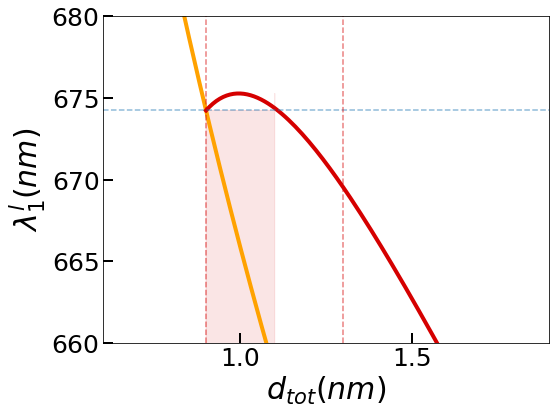

In [285]:

corr = np.linspace(0, 60, len(d_hBN)) + 1
temp = wl_hBN_noair_60nm - corr
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#sweeping the citrate thickness with no hBN
ax.plot(d_cit_60nm, wl_cit_60nm-1, color=colours[60], label=u'$\u0394 d_{cit}$', linewidth=4)
# sweeping the hBN thickness with contstant citrate thickness of 0.9nm
ax.plot(d_hBN_noair_60nm, temp, color=colours[30], label=u'$\u0394 d_{hBN} + d_{cit}$', linewidth=4)

ax.tick_params(labelsize=25, direction='in', width=2, size=10)
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel('$\lambda_1^l (nm)$', fontsize=30)
ax.set_xlim(0.6,1.9)
ax.set_ylim(660, 680)

arg_eqiv = np.argwhere(temp > temp[0])[:][-1][0]
ax.axhline(wl_hBN_noair_60nm[0]-1, linestyle = '--', alpha=0.5)
ax.axvline(d_hBN_noair_60nm[0], linestyle = '--', color=colours[30], alpha=0.5)
ax.axvline(d_hBN_noair_60nm[0]+0.4, linestyle = '--', color=colours[30], alpha=0.5 )

ax.fill_betweenx(wl_hBN_noair_60nm-corr, d_hBN_noair_60nm[0], d_hBN_noair_60nm[arg_eqiv], alpha=0.1, color=colours[30])
#ax.legend(fontsize=24)

plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_hBN change w cit vs d_ct change 60nm NP apex zoom.jpg')
print ( d_hBN_noair_60nm[arg_eqiv] - d_hBN_noair_60nm[0])

In [132]:
min(d_hBN_noair_60nm)

0.9

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


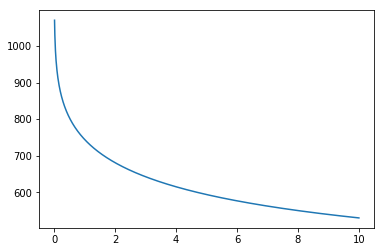

In [64]:
wl_hBN_60nm, d_hBN_60nm = jjb_model(0, 10, 2.13, wl_corr=True, R=60)


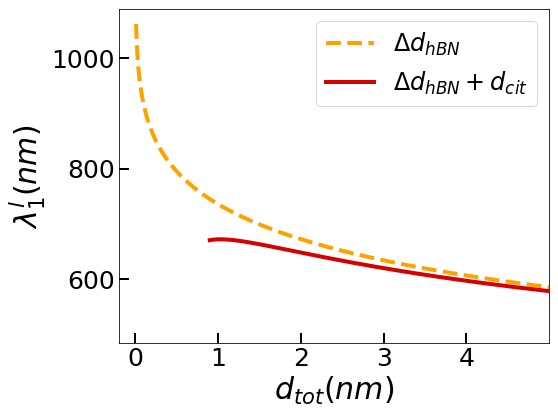

In [128]:

corr=8.5
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(d_hBN_60nm, wl_hBN_60nm-corr, color=colours[60], label=u'$\u0394 d_{hBN}$', linewidth=4, linestyle='--')
ax.plot(d_hBN_noair_60nm, wl_hBN_noair_60nm-corr, color=colours[30], label=u'$\u0394 d_{hBN} + d_{cit}$', linewidth=4)
ax.legend(fontsize=24)
ax.tick_params(labelsize=25, direction='in', width=2, size=10)
ax.set_xlabel('$d_{tot}(nm)$', fontsize=30)
ax.set_ylabel('$\lambda_1^l(nm)$', fontsize=30)
ax.set_xlim(-0.2,5)
ax.set_xticks(np.arange(0,5, 1))
plt.tight_layout(pad=1.6)
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Boron nitride spacer calculations\\d_hBN change w cit vs d_hBN change no cit 60nm.jpg')

In [107]:
np.arange(0,5, 1)

array([0, 1, 2, 3, 4])